# Property price prediction project


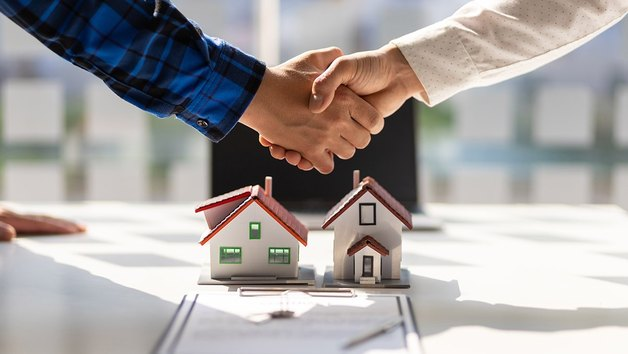

In [1]:
import IPython
IPython.display.Image('https://na.rdcpix.com/307f0bb1b63fb77c661794a66a6b500aw-c525726921rd-w628_h354_r4_q80.jpg')

# Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

## step 1 : Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns 
import os 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
# dataset
from sklearn.datasets import fetch_california_housing

import warnings
warnings.filterwarnings('ignore')

print('modules Loaded Successfully')

modules Loaded Successfully


## step 2 : Load Data Create Df

In [3]:
data_dict = fetch_california_housing()

data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(data_dict['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
print(data_dict['target_names'])

['MedHouseVal']


In [6]:
df = pd.DataFrame(data_dict['data'],
                  columns= data_dict['feature_names'])

df['MedHouseVal'] = data_dict['target']

print('data Loaded Successfully')

data Loaded Successfully


## Step 3: Understanding Data using EDA

In [7]:
# shape 
df.shape

(20640, 9)

In [8]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
# checking Null values 
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [11]:
# hundreds of thousands of dollars ($100,000) 1 lakh Dollars
# average number of household members in a block 
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14366,4.1806,44.0,6.470046,1.0553,513.0,2.364055,32.74,-117.23,2.638


In [12]:
# all data must be in Numerical, Dataset contains all values in numerical 
# we can proceed thhis for Analysis

In [ ]:
# checking data distribution
# it takes time 
# comment out it just bcoz it takes much timr

sns.pairplot(data = df,corner= True)
plt.show()

In [ ]:
# checking data distribution


plt.title('Features vs target Corr')
sns.heatmap(df.corr().round(2),annot= True, cmap= 'mako')
plt.show()

In [ ]:
# data describe 
df.describe()

In [ ]:
# histogram 
plt.figure(figsize = (15,12))
for i,j in enumerate(df.columns):
  plt.subplot(3,3, i+1)
  plt.hist(df[j],color = 'blue', alpha = 0.3)
  plt.title(j+' Analysis')
plt.show()


In [ ]:
# Distribution of target Value MedHouseVal vs MedInc

sns.jointplot(data=df, x= 'MedHouseVal',y='MedInc')
plt.show()

In [ ]:
# sns.regplot(data = df, x = 'MedHouseVal', y = 'MedInc')
# plt.show()

In [ ]:
# sns.histplot(data = df, x = 'MedHouseVal', color = 'b')
# sns.kdeplot(data = df, x = 'MedHouseVal',color  = 'r')
# plt.show()

In [ ]:
plt.title('MedHouseVal Distribution')
sns.histplot(data = df, x = 'MedHouseVal', color = 'b',kde= True)
plt.show()

In [ ]:
df['MedHouseVal'].describe()
# 75% price is less than 2.64 lakh dollar 

## Step 4: Feature Engineering and Preprocessing

In [ ]:
# convert data to same scale for better prediction
#1. normalisation = minmax_scale ;; formula : Xnew= X-Xmin/Xmax-Xmin
#2. standarization :


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler is used to normalize data.

X = df.iloc[:,:-1]
y = df['MedHouseVal']

scaler = MinMaxScaler()

scaler.fit(X) #learning: fit data in o to 1 

X_scaled = scaler.transform(X)

print('Done')


In [ ]:
X_scaled
# print(X_scaled.min())
# print(X_scaled.max())

## Step 5: Train test split: split data for training and testing 

In [ ]:
# train test split : Divite into train part and test part

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test this sequence is mandatory..
# default value of the random_state is 42
# random_state and random.seed are same but it uses in defferent methods
# from random_state is used to shuffle data[random data ]

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=.2, random_state= 150)
print('Done')

In [ ]:
# # unppacking 
# a,b,c,d = [52,55,5,8]
# print(a)

In [ ]:
# import random 
# random.seed(55) #used to fix values in particular numerical 
# random.randint(1,50)

In [ ]:
print('Shape of Xtrain', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)

## Step 6: Model Building

#### step6.1: Linear Model Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model =  LinearRegression() #Object Creation

lr_model.fit(X_train,y_train) #Training model

##### step 6.1.2: Model Prediction

In [ ]:
# test data : X_test

y_pred = lr_model.predict(X_test)
y_pred

In [ ]:
# 20%: Actual answer: y_test ; Predicted: y_pred

lr_compare_df = pd.DataFrame({'Actual House Price':y_test,
              'Predicted House Price':y_pred})

print('Done')

In [ ]:
lr_compare_df

In [ ]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('LR MAE:',lr_mae)

In [ ]:
lr_mse = mean_squared_error(y_test,y_pred)
print('LR MSE:',lr_mse)

In [ ]:
lr_rmse = root_mean_squared_error(y_test,y_pred)
print('LR RMSE:',lr_rmse)

In [ ]:
# training score
lr_train_score = lr_model.score(X_train,y_train)
print('Training Score',lr_train_score)

# testing score 
lr_test_score= lr_model.score(X_test,y_test)
print('Testing Score',lr_test_score)


In [ ]:
# model Score : apx: 60%, model not that much good we need, more 
# alternate Model call
# :features vs feature high corr(x col:8)

# variance inflation factor[VIF] > 10 we can drop taht coln
# bias vs variance Trade off : intersect

# ML engineers work on the concept of biasedneess and variance

# training score:high , testing score : low = overfit check biasedness
# training score:low , testing score : low = underfit  check variance
# training score:good , testing score : good = balanced

# lasso regression 
# ridge regression( works on mathematical model)

#PCA [principal components Analysis ] it reduces useless features
# PCA: imp Features(cols) Find:(8:5)

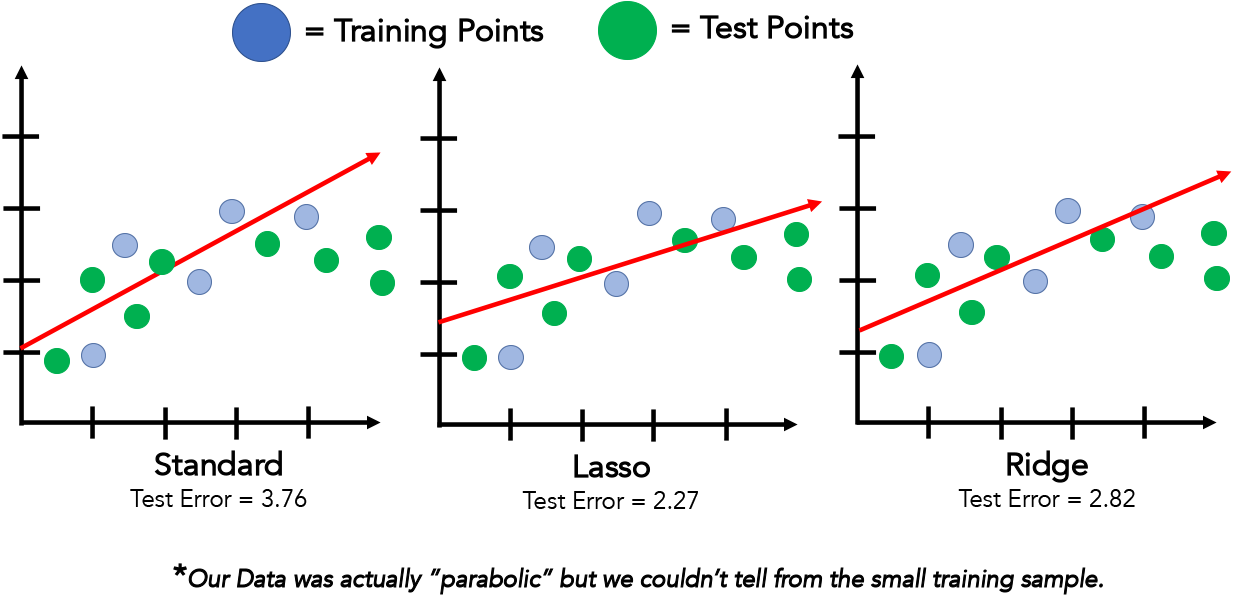

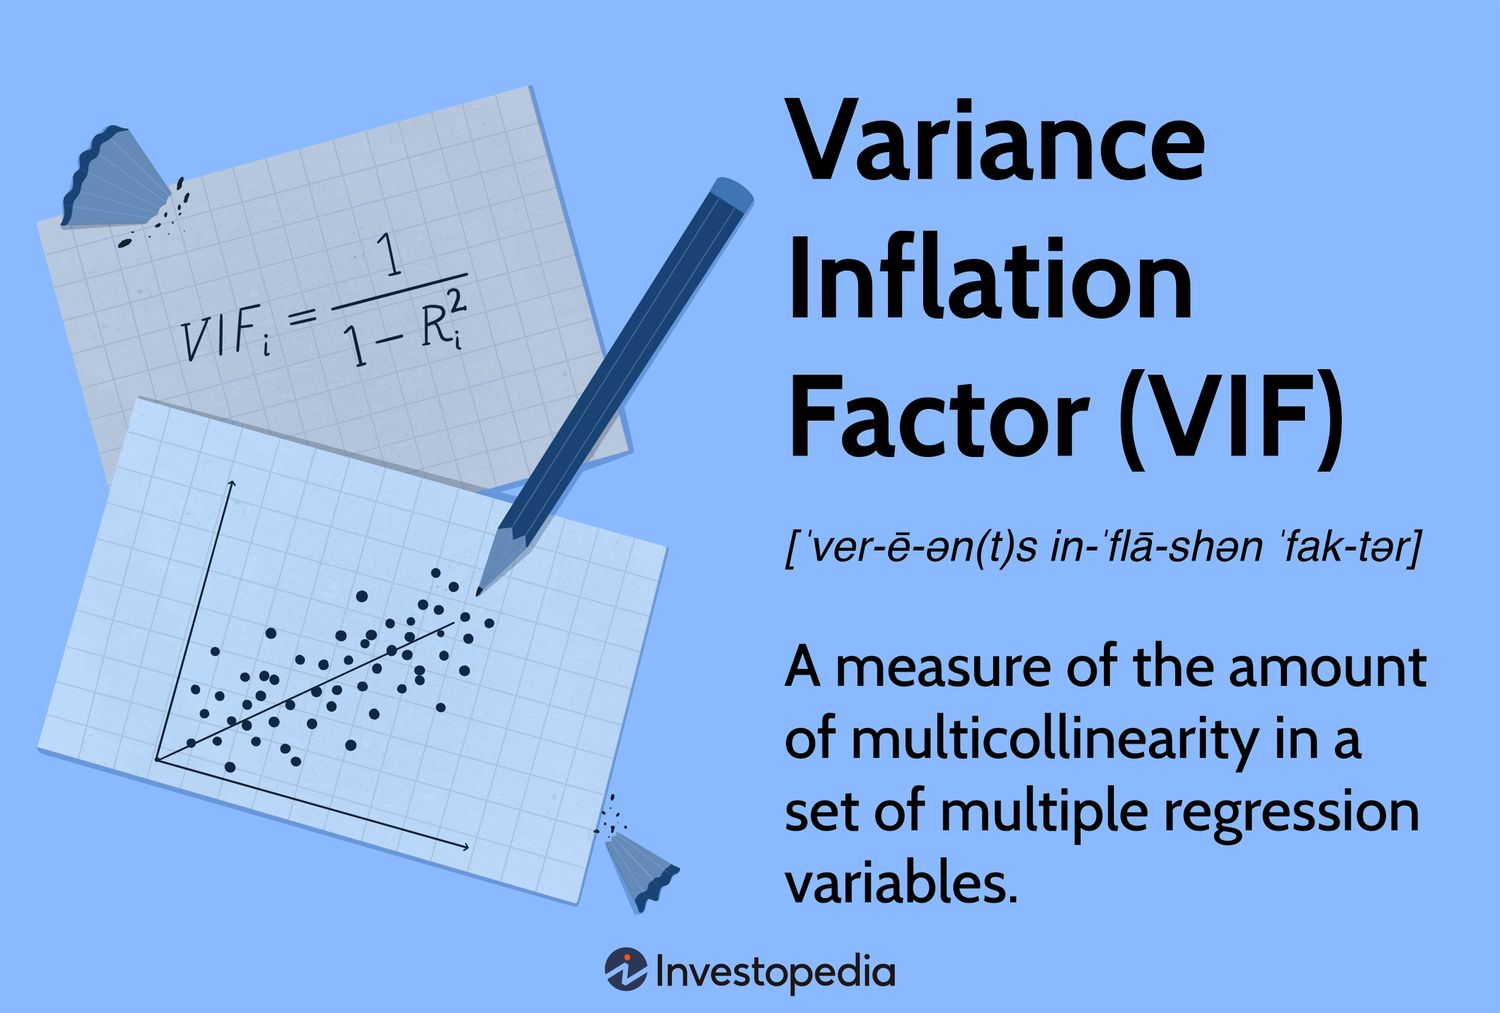

##### Step 6.1.3: Checking VIF and Drop column if value vif>10

In [ ]:

X_train_df=pd.DataFrame(X_train,columns=data_dict['feature_names'])
X_train_df.sample()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df['intercept'] = 1

X_train_df.sample()
# multicollinearity means x depends on x.
# ust to understand we add intercept as C in formula y = mx+C.

In [ ]:
# x is an Inderpendent feature 
# we use list comprihension method in VIF 
# eg.print(['Hello'+str(i) for i in range(10)])
# runn loop inside list


In [ ]:
# X_train_df.columns

In [ ]:
# X_train_df.shape[1]

In [ ]:
# X_train_df.values

In [ ]:
[i for i in range(X_train_df.shape[1])]

In [ ]:
vif_df = pd.DataFrame()
vif_df['Features'] = list(data_dict['feature_names'])+['Intercept']
                          

vif_value= [variance_inflation_factor(X_train_df.values,i) for i in range(X_train_df.shape[1])]
vif_df['VIF factor'] = vif_value

vif_df.sort_values(by='VIF factor', ascending = False)

# because latitude and longitude has high corr and vif close to 10 we can drop one or both 


In [ ]:
col = list(X.columns)
col.remove('Latitude')
# print(col)

# X_train_new_after_vif = vif_df
X_train_vif= X_train_df[col]
X_train_vif.sample()

In [ ]:
# r2 score is use when we want to know correlation between y


In [ ]:
def built_model(ml_model, col):
    new_X_train = pd.DataFrame(X_train, columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]

    new_X_test =  pd.DataFrame(X_test, columns = data_dict['feature_names'])
    final_X_test =new_X_test[col]

    machine_model = ml_model()
    machine_model.fit(final_X_train,y_train)

    model_y_pred = machine_model.predict(final_X_test)
    
    model_train_score = machine_model.score(final_X_train,y_train)
    model_test_score = machine_model.score(final_X_test,y_test)

    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = root_mean_squared_error(y_test,model_y_pred)
    model_r2_score = r2_score(y_test,model_y_pred)
    
    model_metrics = {'Model Training Score':model_train_score,
                    'Model Test Score':model_test_score,
                    'MAE error':model_mae_error,
                    'MSE error':model_mse_error,
                    'RMSE error':model_rmse_error,
                    'R2 score': model_r2_score}

    model_matrix = pd.DataFrame(model_metrics,index = [1])

    return model_matrix,machine_model

In [ ]:
print(col)

In [ ]:
ml_model = LinearRegression

built_model(ml_model,col)[0]

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
ml_model = Lasso
# lasso regression mot giving much score, we can reject this model 
built_model(ml_model,col)[0]

In [ ]:
ml_model = Ridge

built_model(ml_model,col)[0]

In [ ]:
col = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']

In [ ]:
all_model= [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# StandardScaler = ss
ss_X = sc.fit_transform(X)

i=1
while True:
    X_train, X_test, y_train, y_test = train_test_split(ss_X,y, random_state=i,test_size=0.1)
    i+=1

    temp_df,final_model = built_model(Ridge,col)
    score = temp_df['Model Test Score'].values[0]

    print('Score is',score)
    if score >= 0.6:
        print('Best random state',i)
        display(temp_df)
        break
        
    display(clear=True)

In [ ]:
# best random state id 178

In [ ]:
final_model

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(ss_X,y, random_state=178,test_size=0.1)
built_model(Ridge,col)[0]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(ss_X,y, random_state=178,test_size=0.1)
built_model(LinearRegression,col)[0]

## Step 7: Model save and Extra Objects

In [ ]:
import pickle 

with open('House_price_pred_ridge_model.pkl','wb') as f:
    pickle.dump(final_model,f)

with open('sc_scaler.pkl','wb') as f:
    pickle.dump(sc,f)

print('ML Model Saved Successfully')

# Step 8: Website building and Localhost Deployment 

In [ ]:
# ML model: client
# website: Input value: Prediction
# website: Python based: Django, Flask , FastAPI,(models use  to create websites by python ): Streamlit (python's module)
# Streamlit : python Web-based, framework , Fast ML model test website 
# Streamlit = Development+ Deployment (for ML Engineers)


In [ ]:
# pip install streamlit

In [ ]:
import streamlit as st

print('Done')

In [ ]:
# st.title('California Housing Price Prediction')

In [ ]:
!streamlit run house.py

In [ ]:
# get code working directory
os.getcwd()


In [ ]:
col

In [ ]:
df[col]

In [ ]:
df.to_csv('california.csv')
print('Done')

In [ ]:
for i in df[col]:
    min_value, max_value = df[i].agg(['min','max'])
    
    print('min',i,min_value)
    print('max',i,max_value)

In [ ]:
temp_df = pd.read_csv('california.csv')

for i in temp_df[col]:
    min_value, max_value = temp_df[i].agg(['min','max'])

# step 9: Live deployment using Streamlit

In [ ]:
# import streamlit as st
# import pandas as pd
# import random
# from sklearn.preprocessing import StandardScaler
# import pickle
# import time
# 

In [ ]:
# Github : folder: housing price project
# file: requirements.txt = we will write those models whichh is important for app.py to run
# in our project app.py is known as house.py

# it mandatory to add modules which are in use to requirements 


In [ ]:
pd.__version__

In [ ]:
st.__version__